<table>
    <tr style="background-color:white;">
        <td width="60%">
            <div style="height: 25px;"></div>
            <div align="left" style="color: #4b324e; font-size: 40px; font-weight: bold;">Taller de Qiskit</div>
        </td>
        <td>
            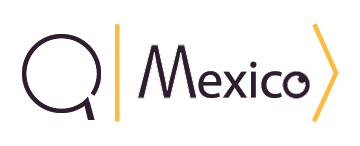
        </td>
    </tr>
</table>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $

<div align="center" style="color: #EE2A6F; font-size: 30px; font-weight: bold;">Simuladores</div>

<div align="right" style="font-size: 15px; font-weight: normal;">Preparado por Claudia Zendejas-Morales</div>

<a href="https://opensource.org/licenses/Apache-2.0"></a>

# Contenido

1. [Introducción](#intro)
   1. [¿Qué es un backend?](#intro.1)
   2. [¿Qué es un simulador?](#intro.2)
   3. [Backends reales](#intro.3)
   4. [¿Qué necesito?](#intro.4)
2. [Proveedor Aer](#secc1)
   1. [Obtener información sobre un backend](#secc1.1)
3. [Simulador Aer](#secc2)
   1. [Simulando un circuito cuántico](#secc2.1)
   2. [Transpilar un circuito](#secc2.2)
   3. [Resultados de medición para cada iteración](#secc2.3)
   4. [Opciones del simulador Aer](#secc2.4)
   5. [Método de simulación](#secc2.5)
   6. [Precisión de las simulaciones](#secc2.6)
   7. [Guardar el estado del simulador](#secc2.7)
      1. [Guardar el vector de estado final](#secc2.7.1)
      2. [Guardar el circuito como una matriz unitaria](#secc2.7.2)
      3. [Guardar múltiples estados](#secc2.7.3)
   8. [Configurar el simulador a un estado personalizado](#secc2.8)
      1. [Establecer un vector de estado personalizado](#secc2.8.1)
      2. [Establecer el estado inicial de un circuito](#secc2.8.2)
      3. [Establecer una matriz de densidad personalizada](#secc2.8.3)
      4. [Establecer un estado estabilizador personalizado](#secc2.8.4)
      5. [Establecer una matriz unitaria personalizada](#secc2.8.5)
4. [Referencias](#secc3)

<a id="intro"></a>
# Introducción

Los simuladores de backends te permiten explorar la ejecución de los circuitos cuánticos, al momento de hacer tus prototipos puedes diseñarlos de manera ágil, teniendo una visión de cómo será ejecutarlos en hardware real posteriormente. Esto es posible ya que las simulaciones te permiten caracterizar la respuesta al ruido y la sensibilidad de un circuito.

**Qiskit Aer** proporciona simuladores de backends de computación cuántica de alto rendimiento con modelos de ruido realistas. Los backends permiten probar y optimizar circuitos cuánticos y soluciones de forma local o en la nube, y comparar con dispositivos cuánticos reales en un entorno optimizado.

En este notebook revisaremos a cuáles simuladores de backend tenemos acceso y qué podemos hacer con estos.

<a id="intro.1"></a>
## ¿Qué es un backend?

En computación son comunes los términos _frontend_ y _**backend**_, el primero se refiere a la parte que interactúa con los usuarios, mientras que el segundo se refiere a la parte que procesa las entradas que se reciben desde el _frontend_, en "segundo plano", es decir, no solemos verlo directamente.

Los **Qiskitters** (quienes usamos Qiskit), interactuamos con ambas partes de Qiskit, es decir, con su _frontend_, al usar las clases de alto nivel programadas en Python para nuestra conveniencia (por ejemplo la clase `QuantumCircuit`), y con su _backend_, que son los motores que ejecutan nuestros circuitos cuánticos. Estos motores pueden ser computadoras cuánticas reales o simuladores.

<a id="intro.2"></a>
## ¿Qué es un simulador?

Los motores reales (computadoras cuánticas reales) son costosos y limitados, por lo que no es viable poder ejecutar todos nuestros circuitos y las pruebas que realizamos al irlos diseñando en estos backends reales, para ello existen los simuladores de backends, o simplemente **simuladores**. 

Los simuladores usualmente son ejecutados en nuestra computadora local y simulan el comportamiento de una computadora cuántica real. La simulación puede variar entre simuladores, de ahí que existan varios de ellos; por ejemplo, el rendimiento puede cambiar debido a la limitante de compuertas disponibles. Más adelante aprenderemos sobre el comportamiento de algunos de los simuladores.

<a id="intro.3"></a>
## Backends reales

La recomendación siempre va a ser que diseñes y realices tus pruebas de tus circuitos cuánticos primero en simuladores, y cuando tu(s) circuito(s) ya esté(n) listo(s), puedes procecer a ejecutarlo(s) en computadoras cuánticas reales. Para ello existe la plataforma [IBM Quantum Experience](https://quantum-computing.ibm.com/). Una vez creada una cuenta, puedes mandar ejecutar tus circuitos en diferentes computadoras cuánticas que se ponen a disposición del público. Cabe señalar que la demanda es alta y deberás esperar desde minutos hasta horas para que tu circuito sea ejecutado.

En la plataforma existe una gran variedad de backends que pueden ser usados por el público en general. Estos dispostivos han ido cambiando con el tiempo y se espera que la lista de los mismos siga cambiando, por lo que es importante consultar los disponibles al momento de querer ejecutar tus circuitos en backends reales.

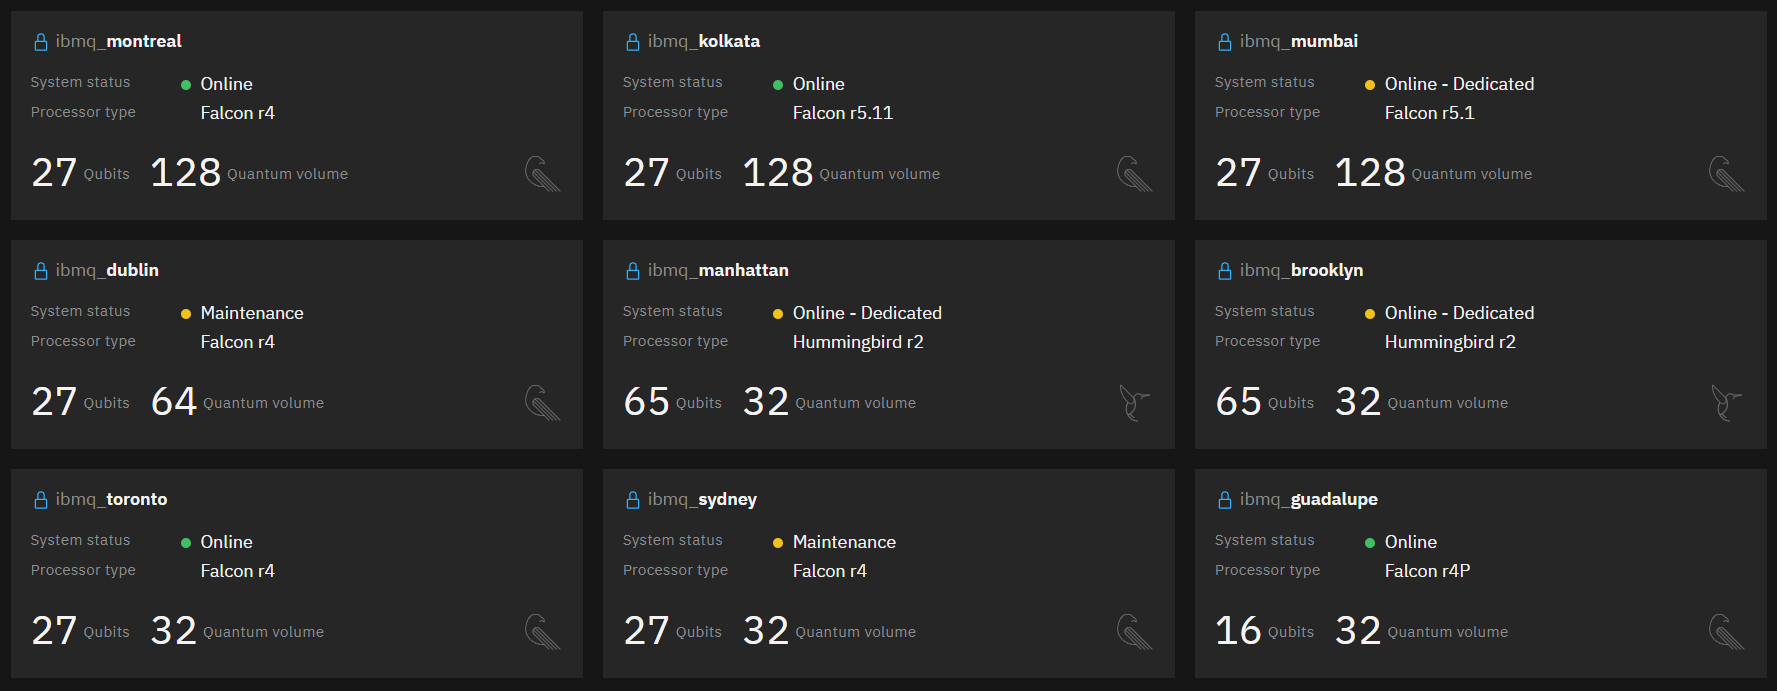

Así mismo existen simuladores de backend en la plataforma, que proveen características y cantidades interesantes de qubits, como el llamado `simulator_stabilizer` con $5000$ qubits.

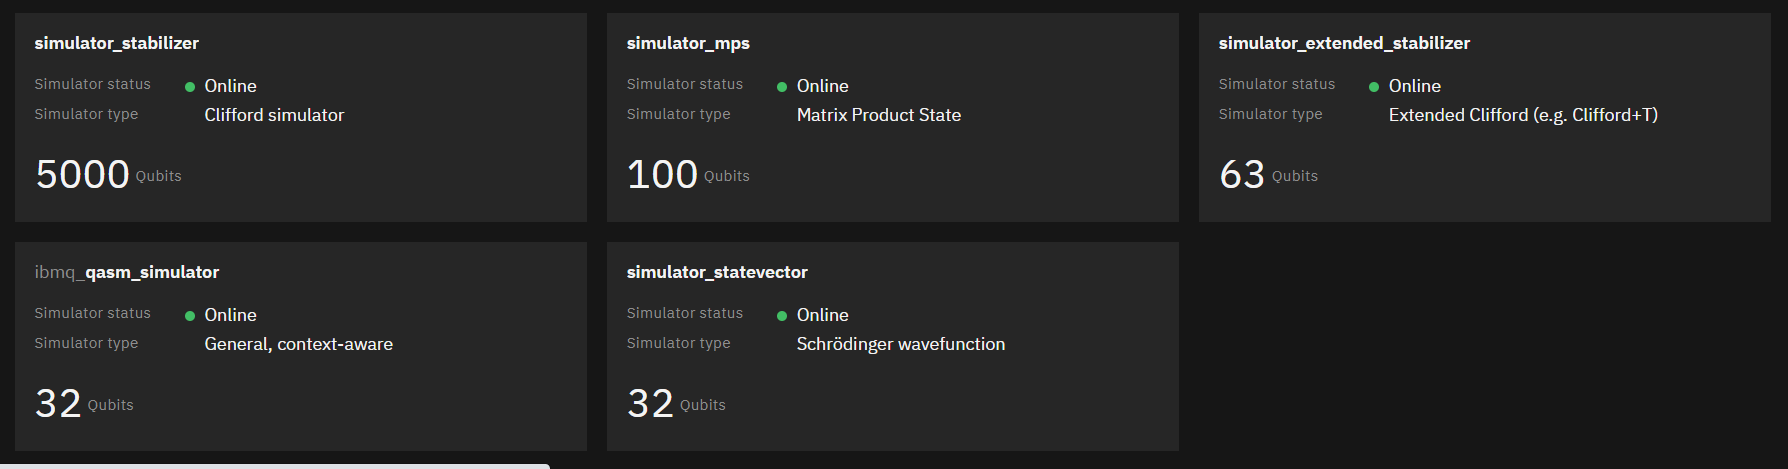

<a id="intro.4"></a>
## ¿Qué necesito?

El módulo Qiskit Aer. Por lo que necesitamos realizar las importaciones necesarias para trabajar con los simuladores de backends:

In [1]:
# Importar módulos de Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi                                          # contiene funciones de apoyo

# Importar librerías auxiliares
import numpy as np

<a id="secc1"></a>
# Proveedor Aer

El proveedor Aer contiene una variedad de backends de simulación de alto rendimiento para distintos métodos de simulación. Los backends disponibles en el sistema actual se pueden consultar al ejecutar `Aer.backends()`.

In [2]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

Podemos observar que existen varios backends definidos en la clase `AerSimulator`, los cuales por su nombre podemos saber para que nos sirven. La clase `PulseSimulator` nos proporciona el simulador que nos permite trabajar con pulsos.

Además tenemos los backends que se siguen manteniendo por retrocompatibilidad con versiones anteriores de Qiskit Aer, estos son `QasmSimulator`, `StatevectorSimulator` y `UnitarySimulator`.


| Nombre | Descripción |
|:---|:---|
| [`AerSimulator`](https://qiskit.org/documentation/stubs/qiskit.providers.aer.AerSimulator.html#qiskit.providers.aer.AerSimulator)([configuration, properties, ...]) | Simulador de backend de circuitos cuánticos ruidosos|
| [`PulseSimulator`](https://qiskit.org/documentation/stubs/qiskit.providers.aer.PulseSimulator.html#qiskit.providers.aer.PulseSimulator)([configuration, properties, ...]) | Simulador de backend de programación de pulsos |
| [`QasmSimulator`](https://qiskit.org/documentation/stubs/qiskit.providers.aer.QasmSimulator.html#qiskit.providers.aer.QasmSimulator)([configuration, properties, ...]) | Simulador de backend de circuitos cuánticos ruidosos |
| [`StatevectorSimulator`](https://qiskit.org/documentation/stubs/qiskit.providers.aer.StatevectorSimulator.html#qiskit.providers.aer.StatevectorSimulator)([configuration, ...]) | Simulador de vector de estado de circuitos cuánticos ideales |
| [`UnitarySimulator`](https://qiskit.org/documentation/stubs/qiskit.providers.aer.UnitarySimulator.html#qiskit.providers.aer.UnitarySimulator)([configuration, ...]) | Simulador de matriz unitaria de circuitos cuánticos ideales |


Cada simulador tiene sus características particulares que permiten diferentes tipos de ejecuciones sobre tus citrcuitos, en la tabla anterior, puedes dar click a cada tipo para revisar sus detalles técnicos (su API). Así mismo cada simulador proporciona una serie de compuertas particulares que es capaz de ejecutar, es decir, si decides usar un simulador sobre otro, no tendrás las mismas compuertas a tu disposición, por lo que debes tener esto en cuenta en tus diseños de circuitos cuánticos.

<div class="alert alert-block alert-danger">

Ten en cuenta que cada backend (simulado o no) soporta una lista particular de compuertas cuánticas y esto puede afectar tus diseños de circuitos cuánticos.
    
</div>

<a id="secc1.1"></a>
## Obtener información sobre un backend

Conocer las particularidades de un backend es importante si deseas realizar circuitos cuánticos muy especializados, para ello se puede preguntar por sus detalles con la función `configuration()`.

In [3]:
simulatorAer = Aer.get_backend('aer_simulator')      # obtenemos el backend principal de Aer: aer_simulator

config = simulatorAer.configuration()                # le pedimos sus detalles



# imprimimos sus caracteristicas básicas

print("Este backend se llama {0}, y se encuentra en su versión {1}.\n"
      "Tiene {2} qubit{3}.\n"
      "{4} programas OpenPulse.\n\n"
      "Las compuertas soportadas en este dispositivo son:\n\n{5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'Soporta' if config.open_pulse else 'No soporta',
                config.basis_gates))

Este backend se llama aer_simulator, y se encuentra en su versión 0.8.2.
Tiene 31 qubits.
No soporta programas OpenPulse.

Las compuertas soportadas en este dispositivo son:

['ccx', 'cp', 'cswap', 'csx', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'delay', 'diagonal', 'h', 'id', 'initialize', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcx_gray', 'mcy', 'mcz', 'multiplexer', 'p', 'pauli', 'r', 'roerror', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'swap', 'sx', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z', 'kraus', 'roerror', 'save_amplitudes', 'save_amplitudes_sq', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_matrix_product_state', 'save_probabilities', 'save_probabilities_dict', 'save_stabilizer', 'save_state', 'save_statevector', 'save_statevector_dict', 'save_superop', 'save_unitary', 'set_density_matrix', 'set_matrix_product_state', 'set_stabilizer', 'set_statevector', 'set_superop', 

Si se trata de un backend real (no simulado) puedes preguntar por sus propiedades con `properties()`, las cuales contienen información que fue medida (a veces reportada por el proveedor), la cual incluye datos como los tiempos $T_1$ y $T_2$, errores por compuerta, duración por compuerta, frecuencia de resonancia, entre otros. En el caso de los backends que permiten el uso de pulsos, proveen información sobre sus valores por defecto para la programación con pulsos, como por ejemplo la frecuencia de modulación. Puedes consultar más detalles en [3].

<a id="secc2"></a>
# Simulador Aer

El backend de simulación principal del proveedor Aer es el `AerSimulator`. Para crear un nuevo simulador se utiliza el método `get_backend('nombre_simulador')`, que recibe como parámetro el nombre del simulador, el cual puede ser uno de los listados en la sección anterior.

El comportamiento predeterminado del backend `AerSimulator` es imitar la ejecución de un dispositivo real. Si se ejecuta un `QuantumCircuit` que contiene mediciones, devolverá un diccionario de conteo que contiene los valores finales de cualquier registro clásico en el circuito. El circuito puede contener compuertas, mediciones, restablecimientos, condicionales, entre otras instrucciones.

<a id="secc2.1"></a>
## Simulando un circuito cuántico

La simulación básica ejecuta un circuito cuántico y devuelve un diccionario de conteos de resultados de la medición. A continuación ejecutamos un circuito simple que prepara un estado de Bell de 2 qubits $\ket{\Psi}=\tfrac{1}{2}\left(\ket{00}+\ket{11}\right)$ y mide ambos qubits.

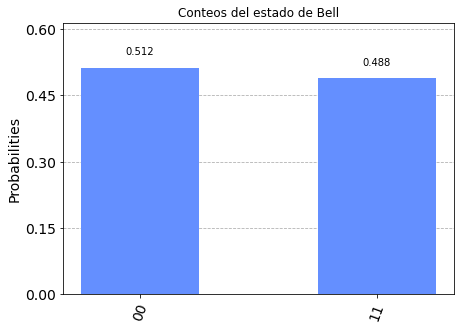

In [4]:
# Crear el circuito
circ = QuantumCircuit(2)     # 2 qubits
circ.h(0)                    # compuerta H en el primer qubit
circ.cx(0, 1)                # compuerta CNOT, con control en el primer qubit y objetivo en el segundo
circ.measure_all()           # medir todos los qubits


# Crear un simulador
simulator = Aer.get_backend('aer_simulator')

# Transpilar para el simulador en específico
circ = transpile(circ, simulator)

# Ejecutar el circuito en el simulador
result = simulator.run(circ).result()

# obtener los conteos de la ejecución
counts = result.get_counts(circ)

# graficar los resultados en un histograma
plot_histogram(counts, title='Conteos del estado de Bell')

<a id="secc2.2"></a>
## Transpilar un circuito

La transpilación es el proceso de reescribir un circuito dado para que coincida con la topología de un dispositivo cuántico específico y/o para optimizar el circuito para su ejecución en los sistemas cuánticos ruidosos de la actualidad.

Al escribir un circuito cuántico, puedes usar cualquier compuerta cuántica (operador unitario) que desees, junto con una colección de operaciones que no son compuertas, como mediciones de qubits y operaciones de restablecimiento. Sin embargo, cuando se ejecuta un circuito en un dispositivo cuántico, principalmente en los dispositivos reales, uno ya no tiene esta flexibilidad. Debido a las limitaciones, por ejemplo, en las interacciones físicas entre qubits, la dificultad para implementar compuertas de varios qubits, electrónica de control, etc., un dispositivo de computación cuántica solo puede admitir de forma nativa un puñado de compuertas cuánticas y operaciones generales.

Otra razón para transpilar nuestros circuitos, es la necesidad de optimizarlos para reducir los efectos del ruido en los resultados. Reescribir circuitos cuánticos para que coincidan con las limitaciones del hardware y optimizar el rendimiento puede estar lejos de ser trivial. El flujo de la lógica en la cadena de herramientas de reescritura no necesita ser lineal y, a menudo, puede tener sub-bucles iterativos, ramas condicionales y otros comportamientos complejos. para mas detalles consulta [aquí](https://qiskit.org/documentation/apidoc/transpiler.html).

Qiskit nos proporciona una manera conveniente para realizar esta tranformación de circuitos, la función `transpile(circuito, backend)`, a la cual se le indica principalmente el circuito a transpilar y el backend al cual deseamos adaptar nuestro circuito, para mas detalles visita la [API de esta función](https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html).

<a id="secc2.3"></a>
## Resultados de medición para cada iteración

El simulador también admite la devolución de una lista de resultados de medición para cada iteración individual (tantos como `shots` se haya indicado. Esto se habilita estableciendo el argumento de palabra clave `memory = True` en la ejecución.

In [5]:
# Ejecutar y obtener la memoria

result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['11', '00', '00', '00', '11', '11', '00', '11', '00', '00']


<a id="secc2.4"></a>
## Opciones del simulador Aer

El backend `AerSimulator` admite una variedad de opciones configurables que se pueden actualizar mediante el método `set_options` que admite una lista de opciones, o el método `set_option` que permite actualizar opción por opción. Estos métodos deben ser llamados antes de ejecutar el backend para que las nuevas opciones sean consideradas. Consulta [aquí](https://qiskit.org/documentation/stubs/qiskit.providers.aer.AerSimulator.html#qiskit.providers.aer.AerSimulator.set_options) la documentación de la API de `AerSimulator` para obtener detalles adicionales.

<a id="secc2.5"></a>
## Método de simulación

El `AerSimulator` admite una variedad de métodos de simulación, cada uno de los cuales admite un conjunto diferente de instrucciones. El método se puede configurar manualmente usando la opción `simulator.set_option(method=valor)`, o se puede obtener un backend de simulador con un método preconfigurado directamente del proveedor Aer usando `Aer.get_backend()`.

Al simular circuitos ideales, cambiar el método entre los diferentes métodos de simulación exactos, como `stabilizer`, `statevector`, `density_matrix` y ` matrix_product_state`  no debería cambiar el resultado de la simulación (aparte de las variaciones habituales de las probabilidades de muestreo para los resultados de medición).

El método de simulación predeterminado es `automatic`, que seleccionará automáticamente uno de los métodos de simulación para cada circuito según las instrucciones del mismo.

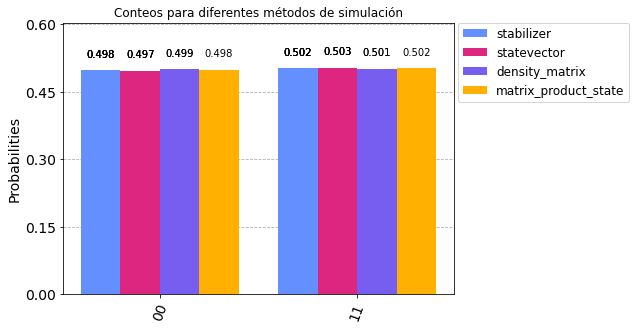

In [6]:
# Aumentar las iteraciones para reducir la variación del muestreo
shots = 10000

# método de simulación: stabilizer
sim_stabilizer = Aer.get_backend('aer_simulator_stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)

# método de simulación: statevector
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# método de simulación: density matrix
sim_density = Aer.get_backend('aer_simulator_density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# método de simulación: matrix product state
sim_mps = Aer.get_backend('aer_simulator_matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)

# graficamos los resultados de los diferentes métodos de simulación
plot_histogram([counts_stabilizer, counts_statevector, counts_density, counts_mps],
               title='Conteos para diferentes métodos de simulación',
               legend=['stabilizer', 'statevector',
                       'density_matrix', 'matrix_product_state'])

<a id="secc2.6"></a>
## Precisión de las simulaciones

Una de las opciones disponibles del simulador permite configurar la precisión de punto flotante para los métodos `statevector`, `density_matrix`, `unitary` y `superop`. Esto se hace usando la opción `set_precision = "single"` o `precision = "double"` (predeterminada).

La precisión `"single"` reducirá a la mitad la memoria requerida y puede proporcionar mejoras de rendimiento en ciertos sistemas.

In [7]:
# Configure a single-precision statevector simulator backend
simulator = Aer.get_backend('aer_simulator_statevector')
simulator.set_options(precision='double')

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)

{'11': 495, '00': 529}


<a id="secc2.7"></a>
## Guardar el estado del simulador

El estado del simulador se puede guardar en una variedad de formatos usando instrucciones personalizadas del simulador, con la finalidad de conocer el estado intermedio o el estado final de una simulación.

| Método del circuito | Descripción | Métodos soportados | 
|:----------------|:-------------|:------------------|
| `save_state` | Guardar el estado del simulador en el formato nativo para el método de simulación | Todos | 
| `save_statevector` | Guardar el estado del simulador como un vector de estado | `"automatic"`, `"statevector"`, `"matrix_product_state"`, `"extended_stabilizer"`|
| `save_stabilizer` | Guardar el estado del simulador como un estabilizador Clifford | `"automatic"`, `"stabilizer"`| 
| `save_density_matrix` | Guardar el estado del simulador como una matriz de densidad | `"automatic"`, `"statevector"`, `"matrix_product_state"`, `"density_matrix"` |
| `save_matrix_product_state` | Guardar el estado del simulador como un tensor de estado de producto matricial | `"automatic"`, `"matrix_product_state"`|
| `save_unitary` | Guardar el estado del simulador como una matriz unitaria del circuito de ejecución | `"automatic"`, `"unitary"`|
| `save_superop` | Guardar el estado del simulador como matriz de superoperador del circuito de ejecución | `"automatic"`, `"superop"`|

Ten en cuenta que estas instrucciones solo son compatibles con el simulador Aer y ocurrirá un error si un circuito que las contiene se ejecuta en un backend que no es un simulador, como un dispositivo IBM Quantum (dispositivo real).

<a id="secc2.7.1"></a>
### Guardar el vector de estado final

Para guardar el vector de estado final de una simulación, podemos usar la instrucción `save_statevector`. Ten en cuenta que esta instrucción debe aplicarse antes de cualquier medición si no queremos guardar el estado posterior a la medición (estado colapsado).

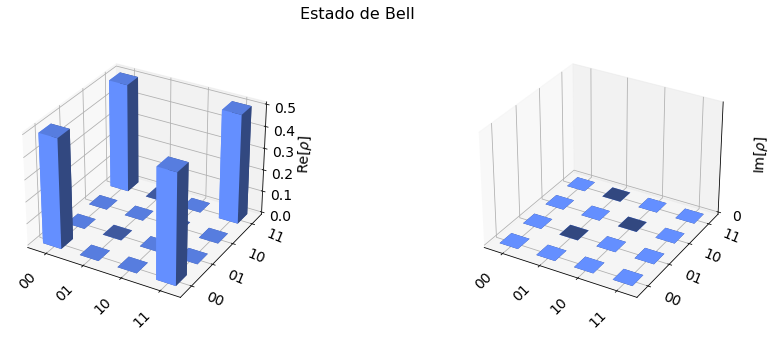

In [8]:
# Crear el ciruito cuántico sin mediciones
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_statevector()                      # indicar que guarde el vector de estado en este punto

# Transpilar para el simulador
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Ejecutar y obtener el vector de estado
result = simulator.run(circ).result()
statevector = result.get_statevector(circ)
plot_state_city(statevector, title='Estado de Bell')       # mostrar el vector de estado en forma de matriz de densidad
                                                           # mas detalles de esta función en notebooks posteriores

<a id="secc2.7.2"></a>
### Guardar el circuito como una matriz unitaria

Para guardar la representación en forma de matriz unitaria de un `QuantumCircuit`, podemos usar la instrucción `save_unitary`. Ten en cuenta que este circuito no puede contener mediciones o restablecimientos, ya que estas instrucciones no son compatibles con el método de simulación `"unitary"`.

In [9]:
# Crear un circuito cuántico sin mediciones
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_unitary()

# Transpilar para el simulador
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Ejecutar y obtener la matriz unitaria
result = simulator.run(circ).result()
unitary = result.get_unitary(circ)
print("Matriz unitaria del circuito:\n", unitary.round(5))

Matriz unitaria del circuito:
 [[ 0.70711+0.j  0.70711-0.j  0.     +0.j  0.     +0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j -0.70711+0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j  0.70711-0.j]
 [ 0.70711+0.j -0.70711+0.j  0.     +0.j  0.     +0.j]]


<a id="secc2.7.3"></a>
### Guardar múltiples estados

También podemos aplicar instrucciones de guardado en varias ubicaciones de un circuito. Ten en cuenta que al hacer esto, debemos proporcionar una etiqueta única para cada instrucción para recuperarlas de los resultados.

In [10]:
# Crear un circuito cuántico sin mediciones
steps = 5                                       # cantidad de pasos que queremos guardar
circ = QuantumCircuit(1)
for i in range(steps):
    circ.save_statevector(label=f'psi_{i}')     # guardar el vector de estado antes de cada compuerta Rx
    circ.rx(i * np.pi / steps, 0)               # aplicar compuerta Rx
circ.save_statevector(label=f'psi_{steps}')     # guardar el estado final

# Transpilar para el simulador
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Ejecutar y obtener los datos guardados
result = simulator.run(circ).result()
data = result.data(0)
data

{'psi_0': array([1.+0.j, 0.+0.j]),
 'psi_1': array([1.+0.j, 0.+0.j]),
 'psi_2': array([0.95105652+0.j        , 0.        -0.30901699j]),
 'psi_3': array([0.58778525+0.j        , 0.        -0.80901699j]),
 'psi_4': array([-0.30901699+0.j        ,  0.        -0.95105652j]),
 'psi_5': array([-1.+0.00000000e+00j,  0.-5.55111512e-17j])}

<a id="secc2.8"></a>
## Configurar el simulador a un estado personalizado

El `AerSimulator` permite configurar un estado personalizado para varios de sus métodos de simulación, con esto no es necesario agregar compuertas que lleven a un estado en particular, uno puede simplemente indicarlo en el circuito, siempre y cuando sea un estado válido.

| Método del circuito | Descripción | Métodos soportados | 
|:----------------|:-------------|:------------------|
| `set_statevector` | Establecer el estado del simulador en el vector de estado especificado | `"automatic"`, `"statevector"`, `"density_matrix"`|
| `set_stabilizer` | Establecer el estado del simulador en el estabilizador Clifford especificado | `"automatic"`, `"stabilizer"`| 
| `set_density_matrix` | Establecer el estado del simulador en la matriz de densidad especificada | `"automatic"`, `"density_matrix"` |
| `set_unitary` | Establecer el estado del simulador en la matriz unitaria especificada | `"automatic"`, `"unitary"`, `"superop"`|
| `set_superop` | Establecer el estado del simulador en la matriz de superoperador especificada | `"automatic"`, `"superop"`|

Cabe señalar que:
- Estas instrucciones deben aplicarse a todos los qubits de un circuito; de lo contrario, se generará una excepción.
- El estado de entrada también debe ser un estado válido (vector de estado, matriz de densidad, unitaria, etc.); de lo contrario, se generará una excepción.
- Estas instrucciones se pueden aplicar en cualquier lugar de un circuito y anularán el estado actual con el especificado. 
- Cualquier valor de registro clásico (por ejemplo, de mediciones anteriores) no se verá afectado.
- Las instrucciones de estado establecidas solo son compatibles con el simulador Aer y darán lugar a un error si un circuito que las contiene se ejecuta en un backend que no es un simulador, como un dispositivo IBM Quantum (dispositivo real).

<a id="secc2.8.1"></a>
### Establecer un vector de estado personalizado

La instrucción `set_statevector` se puede utilizar para establecer un vector de estado personalizado. El vector de estado de entrada debe ser válido, es decir, debe cumplir que $|\braket{\psi}{\psi}|=1$.

In [11]:
# Generar un vector de estado aleatorio
num_qubits = 2
psi = qi.random_statevector(2 ** num_qubits, seed=100)

# Establecer el estado con el vector de estado anterior
circ = QuantumCircuit(num_qubits)
circ.set_statevector(psi)
circ.save_state()

# Transpilar para el simulador
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Ejecutar y obtener los datos guardados
result = simulator.run(circ).result()
result.data(0)

{'statevector': array([ 0.18572453-0.03102771j, -0.26191269-0.18155865j,
         0.12367038-0.47837907j,  0.66510011-0.4200986j ])}

<a id="secc2.8.2"></a>
### Establecer el estado inicial de un circuito

También es posible inicializar el simulador a un vector de estado personalizado usando la instrucción `initialize`. A diferencia de la instrucción `set_statevector`, esta instrucción también es compatible con backends de dispositivos reales.

In [12]:
# Usar la instrucción 'initilize' para establecer el estado inicial
circ = QuantumCircuit(num_qubits)
circ.initialize(psi, range(num_qubits))
circ.save_state()

# Transpilar para el simulador
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Ejecutar y obtener los datos guardados
result = simulator.run(circ).result()
result.data(0)

{'statevector': array([ 0.18572453-0.03102771j, -0.26191269-0.18155865j,
         0.12367038-0.47837907j,  0.66510011-0.4200986j ])}

<a id="secc2.8.3"></a>
### Establecer una matriz de densidad personalizada

La instrucción `set_density_matrix` se puede utilizar para establecer un estado `DensityMatrix` personalizado. La matriz de densidad de entrada debe ser válida, es decir, debe cumplir que, $Tr[\rho]=1, \rho \ge 0$.

In [13]:
# Generar una matriz de densidad aleatoria
num_qubits = 2
rho = qi.random_density_matrix(2 ** num_qubits, seed=100)

# Establecer el estado con la matriz de densidad anterior
circ = QuantumCircuit(num_qubits)
circ.set_density_matrix(rho)
circ.save_state()

# Transpilar para el simulador
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Ejecutar y obtener los datos guardados
result = simulator.run(circ).result()
result.data(0)

{'density_matrix': array([[ 0.2075308 +0.j        ,  0.13161422-0.01760848j,
          0.0442826 +0.07742704j,  0.04852053-0.01303171j],
        [ 0.13161422+0.01760848j,  0.20106116+0.j        ,
          0.02568549-0.03689812j,  0.0482903 -0.04367912j],
        [ 0.0442826 -0.07742704j,  0.02568549+0.03689812j,
          0.39731492+0.j        , -0.01114025-0.13426423j],
        [ 0.04852053+0.01303171j,  0.0482903 +0.04367912j,
         -0.01114025+0.13426423j,  0.19409312+0.j        ]])}

<a id="secc2.8.4"></a>
### Establecer un estado estabilizador personalizado

La instrucción `set_stabilizer` se puede utilizar para establecer un estado de estabilizador Clifford personalizado. El estabilizador de entrada debe ser un Clifford válido. Más detalles de este tipo de estados [aquí](https://arxiv.org/abs/quant-ph/0304125).

In [14]:
# Generar un Clifford C aleatorio
num_qubits = 2
stab = qi.random_clifford(num_qubits, seed=100)

# Establecer el estado con el estabilizador anterior C|0>
circ = QuantumCircuit(num_qubits)
circ.set_stabilizer(stab)
circ.save_state()

# Transpilar para el simulador
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Ejecutar y obtener los datos guardados
result = simulator.run(circ).result()
result.data(0)

{'stabilizer': {'destabilizer': ['-XZ', '-YX'], 'stabilizer': ['+ZZ', '-IZ']}}

<a id="secc2.8.5"></a>
### Establecer una matriz unitaria personalizada

La instrucción `set_unitary` se puede utilizar para establecer un estado de operador unitario personalizado. La matriz unitaria de entrada debe ser válida, es decir, debe cumplir que, $U^\dagger U=\mathbb{1}$.

In [15]:
# Generar una unitaria aleatoria
num_qubits = 2
unitary = qi.random_unitary(2 ** num_qubits, seed=100)

# Establecer el estado con la unitaria anterior
circ = QuantumCircuit(num_qubits)
circ.set_unitary(unitary)
circ.save_state()

# Transpilar para el simulador
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Ejecutar y obtener los datos guardados
result = simulator.run(circ).result()
result.data(0)

{'unitary': array([[-0.44885724-0.26721573j,  0.10468034-0.00288681j,
          0.4631425 +0.15474915j, -0.11151309-0.68210936j],
        [-0.37279054-0.38484834j,  0.3820592 -0.49653433j,
          0.14132327-0.17428515j,  0.19643043+0.48111423j],
        [ 0.2889092 +0.58750499j,  0.39509694-0.22036424j,
          0.49498355+0.2388685j ,  0.25404989-0.00995706j],
        [ 0.01830684+0.10524311j,  0.62584001+0.01343146j,
         -0.52174025-0.37003296j,  0.12232823-0.41548904j]])}

<a id="secc3"></a>
# Referencias

- [1] Qiskit Developer Team. Simulators. Consultado en: https://qiskit.org/documentation/tutorials/simulators/1_aer_provider.html
- [2] Qiskit Developer Team. Aer Provider (qiskit.providers.aer). Consultado en: https://qiskit.org/documentation/apidoc/aer_provider.html
- [3] Qiskit Developer Team. Obtaining information about your backend. Consultado en: https://qiskit.org/documentation/tutorials/circuits_advanced/08_gathering_system_information.html
- [4] IBM Quantum. Test and Optimize Circuits with IBM's Quantum Simulators. Consultado en: https://www.ibm.com/quantum-computing/simulator/
- [5] Qiskit Developer Team. Qiskit Textbook. Consultado en: https://qiskit.org/textbook/preface.html

<table width="100%">
    <tr style="background-color:white;">
        <td>
            <div style="text-align: right;">
            <a href="02_Visualizar_Experimentos.ipynb" style="color: #EE2A6F; font-size: 15px; font-weight: normal;">
                Notebook siguiente: 02_Visualizar_Experimentos >>
            </a>
            </div>
        </td>
    </tr>
</table>